In [42]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

import utils.data
from pyaw import utils

In [2]:
window = 50*20
center = True
min_periods = 1

In [43]:
df11803 = pd.read_pickle(r"\\Diskstation1\file_three\aw\swarm\vires\SW_OPER_MAGA_HR_1B\SW_OPER_MAGA_HR_1B_11803_20151231T225422_20160101T002758.pkl")
df_aux11803 = pd.read_pickle(r"\\Diskstation1\file_three\aw\swarm\vires\AHY9U3~9\SW_OPER_MAGA_HR_1B\aux_SW_OPER_MAGA_HR_1B_11803_20151231T225422_20160101T002758.pkl")
bn,be,bc = utils.data.get_3arrs(df11803['B_NEC'])
bn_mov_ave = utils.data.move_average(bn, window=window, center=center, min_periods=min_periods)
bn_disturb = bn - bn_mov_ave

In [4]:
def plot_latitude_geo_qd(datetimes: np.ndarray,lats_geo,lats_qd,spacecraft,orbit_number,time_range):
    plt.figure()
    plt.plot(datetimes,lats_geo,label='Lat')
    plt.plot(datetimes,lats_qd,label='QDLat')
    plt.legend()

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))  # 每10分钟一个标签
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # 时间格式为 "小时:分钟"

    plt.xlabel('Datetime')
    plt.title(f"Spacecraft {spacecraft} orbit number {orbit_number} from {time_range[0]} to {time_range[1]}")
    plt.show()
    return None

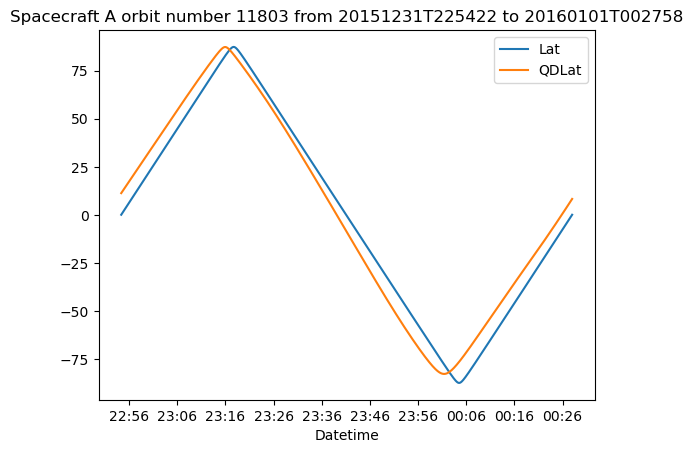

In [5]:
plot_latitude_geo_qd(df11803.index.values,df11803['Latitude'].values,df_aux11803['QDLat'].values,'A',11803,['20151231T225422','20160101T002758'])

In [10]:
from scipy.signal import find_peaks

# 1. Find global extrema
max_index = np.argmax(df11803['Latitude'].values)  # Global maximum
min_index = np.argmin(df11803['Latitude'].values)  # Global minimum

print(f"Global maximum at index {max_index}, latitude: {df11803['Latitude'].values[max_index]}")
print(f"Global minimum at index {min_index}, latitude: {df11803['Latitude'].values[min_index]}")

# 2. Find local extrema (peaks and troughs)
peaks, _ = find_peaks(df11803['Latitude'].values)  # Local maxima
troughs, _ = find_peaks(-df11803['Latitude'].values)  # Local minima

print(f"Local maxima at indices {peaks}, latitudes: {df11803['Latitude'].values[peaks]}")
print(f"Local minima at indices {troughs}, latitudes: {df11803['Latitude'].values[troughs]}")

Global maximum at index 70011, latitude: 87.3445212
Global minimum at index 210396, latitude: -87.3442044
Local maxima at indices [70011], latitudes: [87.3445212]
Local minima at indices [210396], latitudes: [-87.3442044]


In [49]:
def plot_disturb_mag_field(datetimes: np.ndarray, field, latitudes, qdlats, mlts, spacecraft,orbit_number,time_range, step=20000):
    # 创建图像
    fig, ax = plt.subplots(figsize=(18, 8))
    # 绘制数据
    ax.plot(datetimes, field, label='bn')
    plt.legend()

    max_idx_lat = np.argmax(latitudes)
    min_idx_lat = np.argmin(latitudes)
    max_idx_qdlat = np.argmax(qdlats)
    min_idx_qdlat = np.argmin(qdlats)
    max_lat = latitudes[max_idx_lat]
    min_lat = latitudes[min_idx_lat]
    max_qdlat = latitudes[max_idx_qdlat]
    min_qdlat = latitudes[min_idx_qdlat]
    max_lat_dt = datetimes[max_idx_lat]
    min_lat_dt = datetimes[min_idx_lat]
    max_qdlat_dt = datetimes[max_idx_qdlat]
    min_qdlat_dt = datetimes[min_idx_qdlat]
    # datetimes_dic = {'Latitude':[datetimes[np.argmax(latitudes)],datetimes[np.argmin(latitudes)]],
    #                  'QDLat':[datetimes[np.argmax(qdlats)],datetimes[np.argmin(qdlats)]]}
    plt.axvline(max_lat_dt, color='r', linestyle='--')
    plt.text(max_lat_dt, max(field) * 0.9, f"Lat={max_lat:.2f}",rotation=90,color='b', ha='right', va='top')
    plt.axvline(min_lat_dt, color='r', linestyle='--')
    plt.text(min_lat_dt, max(field) * 0.9, f"Lat={min_lat:.2f}",rotation=90,color='b', ha='right', va='top')

    plt.axvline(max_qdlat_dt, color='r', linestyle='--')
    plt.text(max_qdlat_dt, max(field) * 0.9, f"QDLat={max_qdlat:.2f}",rotation=90,color='b', ha='right', va='top')
    plt.axvline(min_qdlat_dt, color='r', linestyle='--')
    plt.text(min_qdlat_dt, max(field) * 0.9, f"QDLat={min_qdlat:.2f}",rotation=90,color='b', ha='right', va='top')
    # for key, value in datetimes_dic.items():
    #     for v in value:
    #         plt.axvline(v, color='r', linestyle='--')
    #         plt.text(v, max(field) * 0.9, f"{key}", rotation=90,color='b', ha='right', va='top')
    #         plt.axvline(v, color='r', linestyle='--')
    #         plt.text(v, max(field) * 0.9, f"{key}", rotation=90,color='b', ha='right', va='top')
    # datetime_ls = [np.datetime64('2015-12-31T23:06:00'),np.datetime64('2015-12-31T23:08:30'),np.datetime64('2015-12-31T23:20:00'),
    #                np.datetime64('2015-12-31T23:27:00'),np.datetime64('2015-12-31T23:53:00'),np.datetime64('2015-12-31T23:57:00'),
    #                np.datetime64('2016-01-01T00:04:00'),np.datetime64('2016-01-01T00:13:00')]
    # for datetime_ in datetime_ls:
    #     plt.axvline(datetime_, color='r', linestyle='--')
    # plt.text(np.datetime64('2015-12-31T23:06'), max(values) * 0.9, f"{np.datetime64('2015-12-31T23:06')}", rotation=90, color='r', ha='right', va='top')
    # ax.set_ylabel('Value', color='b')
    # ax.tick_params(axis='y', labelcolor='b')

    # 设置时间轴标签
    datetime_ticks = datetimes[::step]
    latitude_ticks = latitudes[::step]
    qdlat_ticks = qdlats[::step]
    mlt_ticks = mlts[::step]
    ax.set_xticks(datetime_ticks)
    datetime_ticks_formatted = [t[11:19] for t in np.datetime_as_string(datetime_ticks,unit='s')]
    ax.set_xticklabels([f"time: {t}\nlat: {lat:.2f}°\nqdlat: {qdlat:.2f}\nmlt: {mlt:.2f}" if i == 0 else f"{t}\n{lat:.2f}\n{qdlat:.2f}\n{mlt:.2f}°" for i,t, lat,qdlat,mlt in zip(range(len(datetime_ticks_formatted)),datetime_ticks_formatted, latitude_ticks,qdlat_ticks,mlt_ticks)])
    plt.title(f"Spacecraft {spacecraft} orbit number {orbit_number} from {time_range[0]} to {time_range[1]}")
    plt.show()
    return None

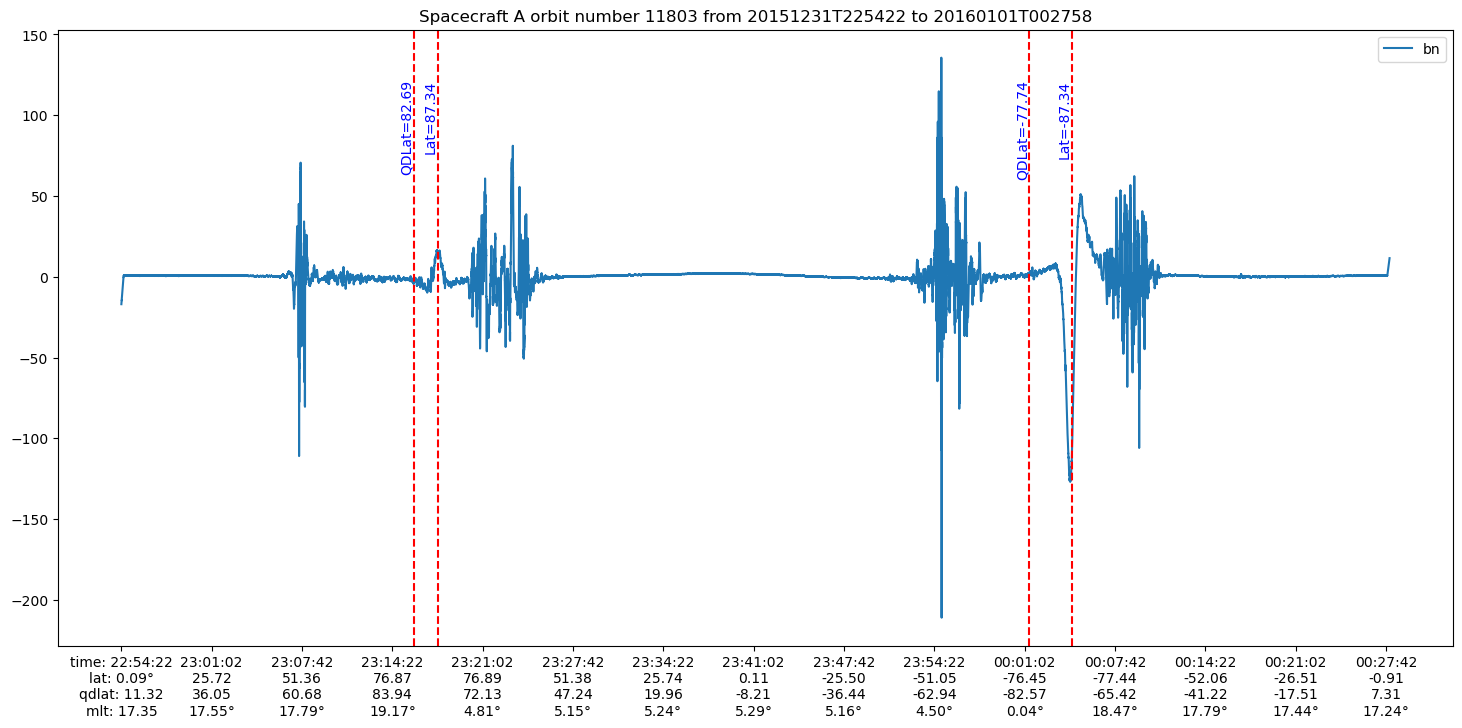

In [50]:
plot_disturb_mag_field(df11803.index.values,bn_disturb,df11803['Latitude'].values,df_aux11803['QDLat'].values,df_aux11803['MLT'].values,'A',11803,['20151231T225422','20160101T002758'])

11804

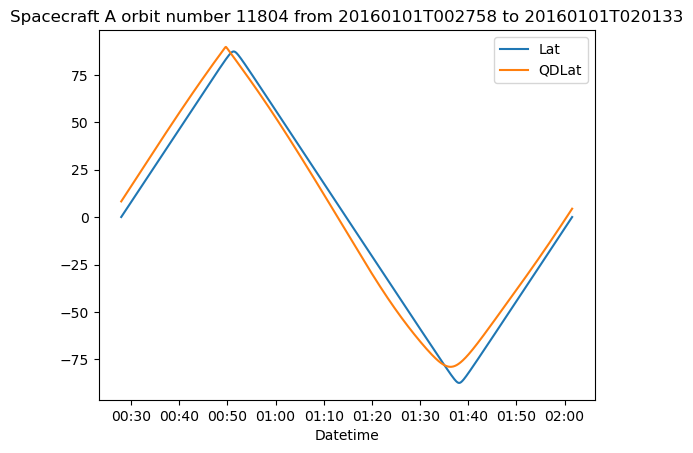

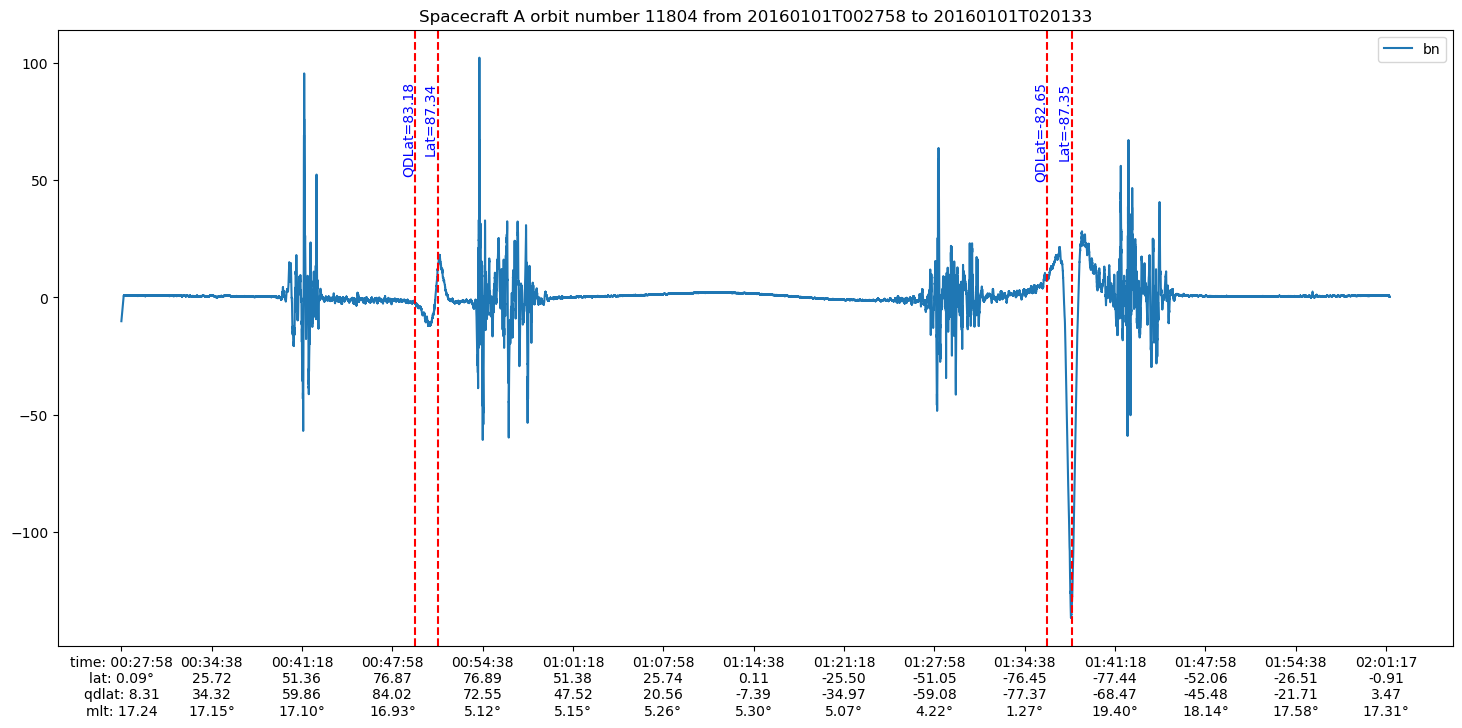

In [51]:
df11804 = pd.read_pickle(r"\\Diskstation1\file_three\aw\swarm\vires\SW_OPER_MAGA_HR_1B\SW_OPER_MAGA_HR_1B_11804_20160101T002758_20160101T020133.pkl")
df_aux11804 = pd.read_pickle(r"\\Diskstation1\file_three\aw\swarm\vires\AHY9U3~9\SW_OPER_MAGA_HR_1B\aux_SW_OPER_MAGA_HR_1B_11804_20160101T002758_20160101T020133.pkl")
bn,be,bc = utils.data.get_3arrs(df11804['B_NEC'])
bn_mov_ave = utils.data.move_average(bn, window=window, center=center, min_periods=min_periods)
bn_disturb = bn - bn_mov_ave

plot_latitude_geo_qd(df11804.index.values,df11804['Latitude'].values,df_aux11804['QDLat'].values,'A',11804,['20160101T002758','20160101T020133'])

plot_disturb_mag_field(df11804.index.values,bn_disturb,df11804['Latitude'].values,df_aux11804['QDLat'].values,df_aux11804['MLT'].values,'A',11804,['20160101T002758','20160101T020133'])

11805

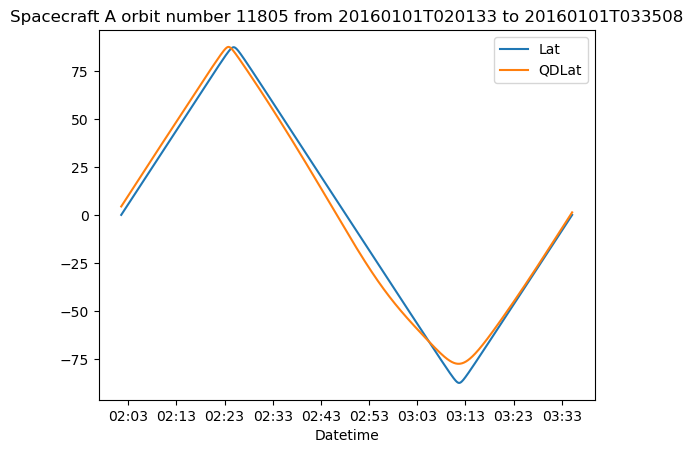

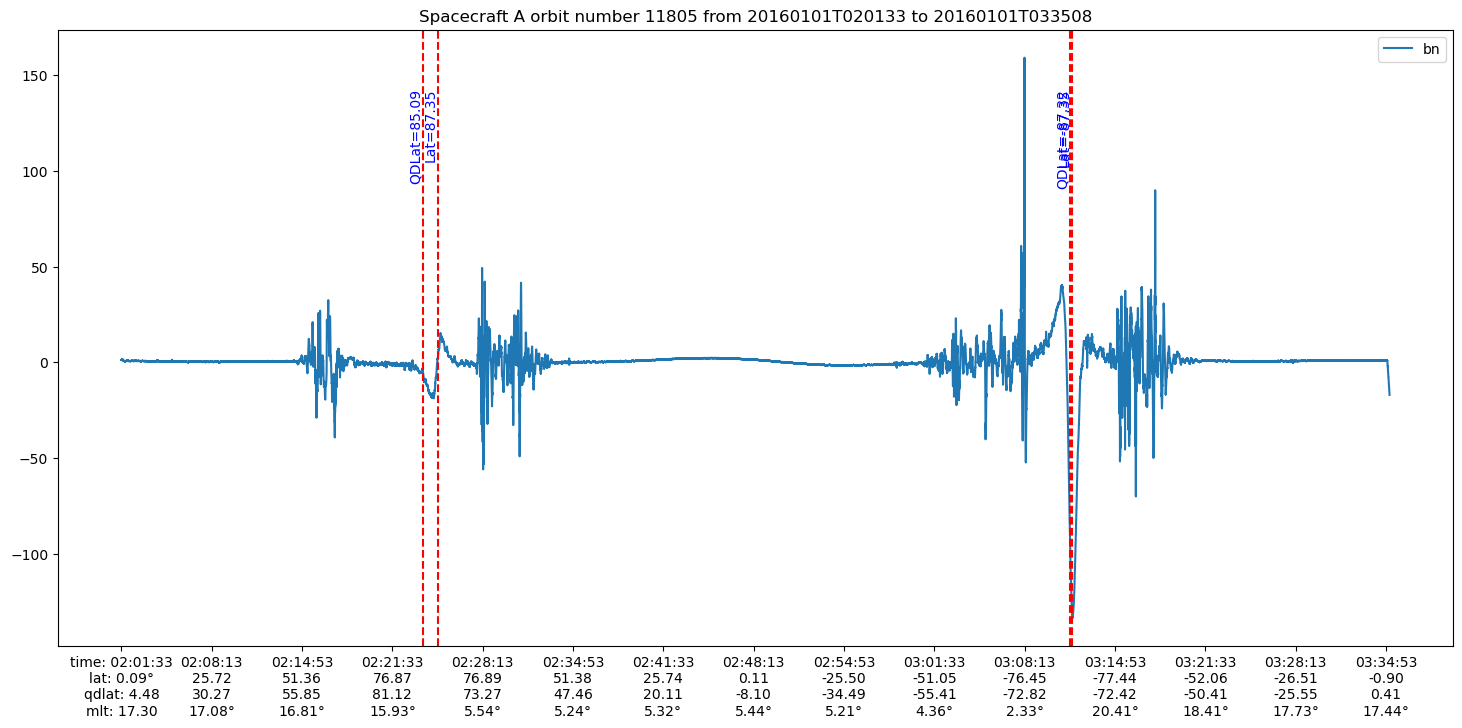

In [52]:
df11805 = pd.read_pickle(r"\\Diskstation1\file_three\aw\swarm\vires\SW_OPER_MAGA_HR_1B\SW_OPER_MAGA_HR_1B_11805_20160101T020133_20160101T033508.pkl")
df_aux11805 = pd.read_pickle(r"\\Diskstation1\file_three\aw\swarm\vires\AHY9U3~9\SW_OPER_MAGA_HR_1B\aux_SW_OPER_MAGA_HR_1B_11805_20160101T020133_20160101T033508.pkl")
bn,be,bc = utils.data.get_3arrs(df11805['B_NEC'])
bn_mov_ave = utils.data.move_average(bn, window=window, center=center, min_periods=min_periods)
bn_disturb = bn - bn_mov_ave

plot_latitude_geo_qd(df11805.index.values,df11805['Latitude'].values,df_aux11805['QDLat'].values,'A',11805,['20160101T020133','20160101T033508'])

plot_disturb_mag_field(df11805.index.values,bn_disturb,df11805['Latitude'].values,df_aux11805['QDLat'].values,df_aux11805['MLT'].values,'A',11805,['20160101T020133','20160101T033508'])

11806

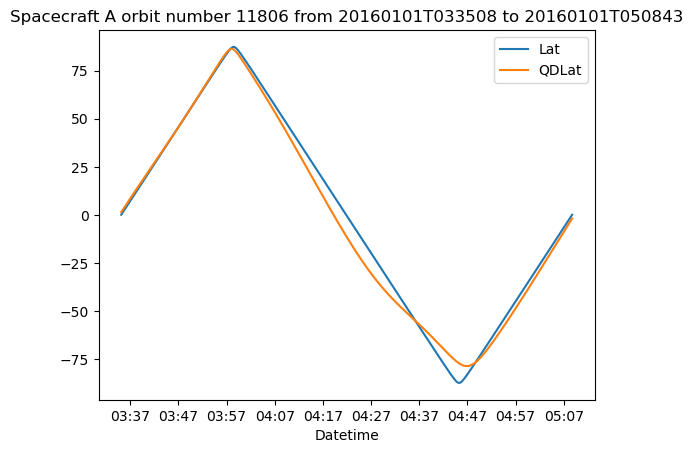

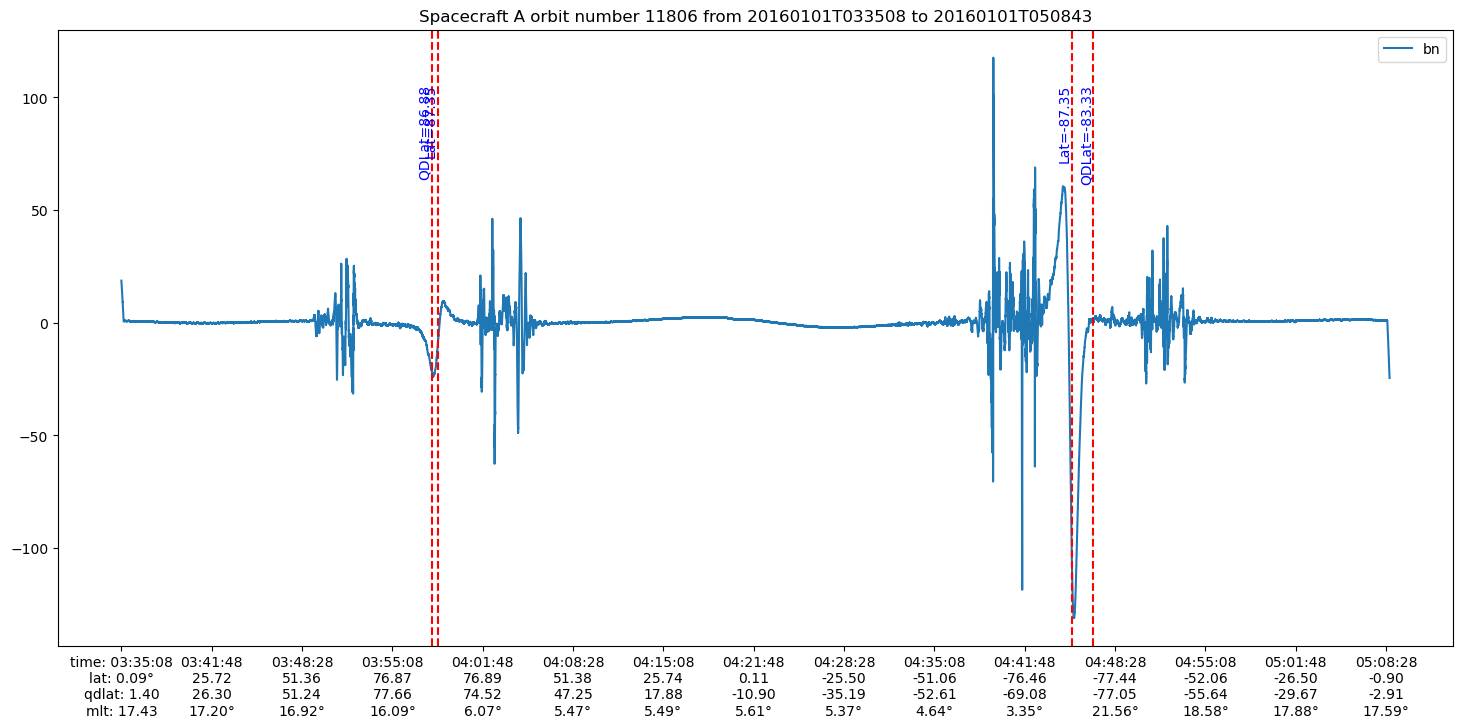

In [53]:
df11806 = pd.read_pickle(r"\\Diskstation1\file_three\aw\swarm\vires\SW_OPER_MAGA_HR_1B\SW_OPER_MAGA_HR_1B_11806_20160101T033508_20160101T050843.pkl")
df_aux11806 = pd.read_pickle(r"\\Diskstation1\file_three\aw\swarm\vires\AHY9U3~9\SW_OPER_MAGA_HR_1B\aux_SW_OPER_MAGA_HR_1B_11806_20160101T033508_20160101T050843.pkl")
bn,be,bc = utils.data.get_3arrs(df11806['B_NEC'])
bn_mov_ave = utils.data.move_average(bn, window=window, center=center, min_periods=min_periods)
bn_disturb = bn - bn_mov_ave

plot_latitude_geo_qd(df11806.index.values,df11806['Latitude'].values,df_aux11806['QDLat'].values,'A',11806,['20160101T033508','20160101T050843'])

plot_disturb_mag_field(df11806.index.values,bn_disturb,df11806['Latitude'].values,df_aux11806['QDLat'].values,df_aux11806['MLT'].values,'A',11806,['20160101T033508','20160101T050843'])

11807

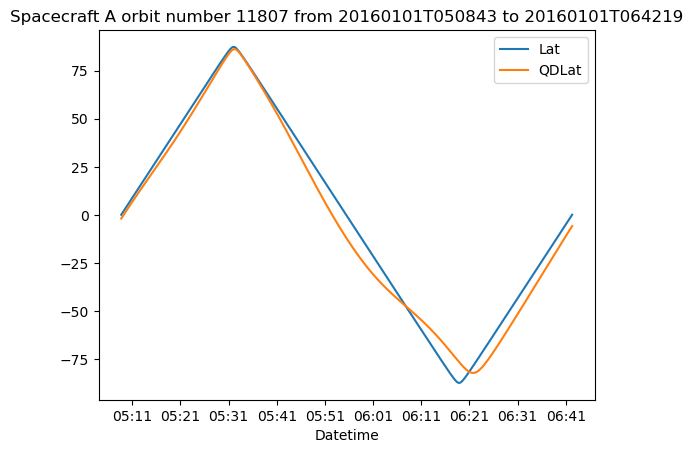

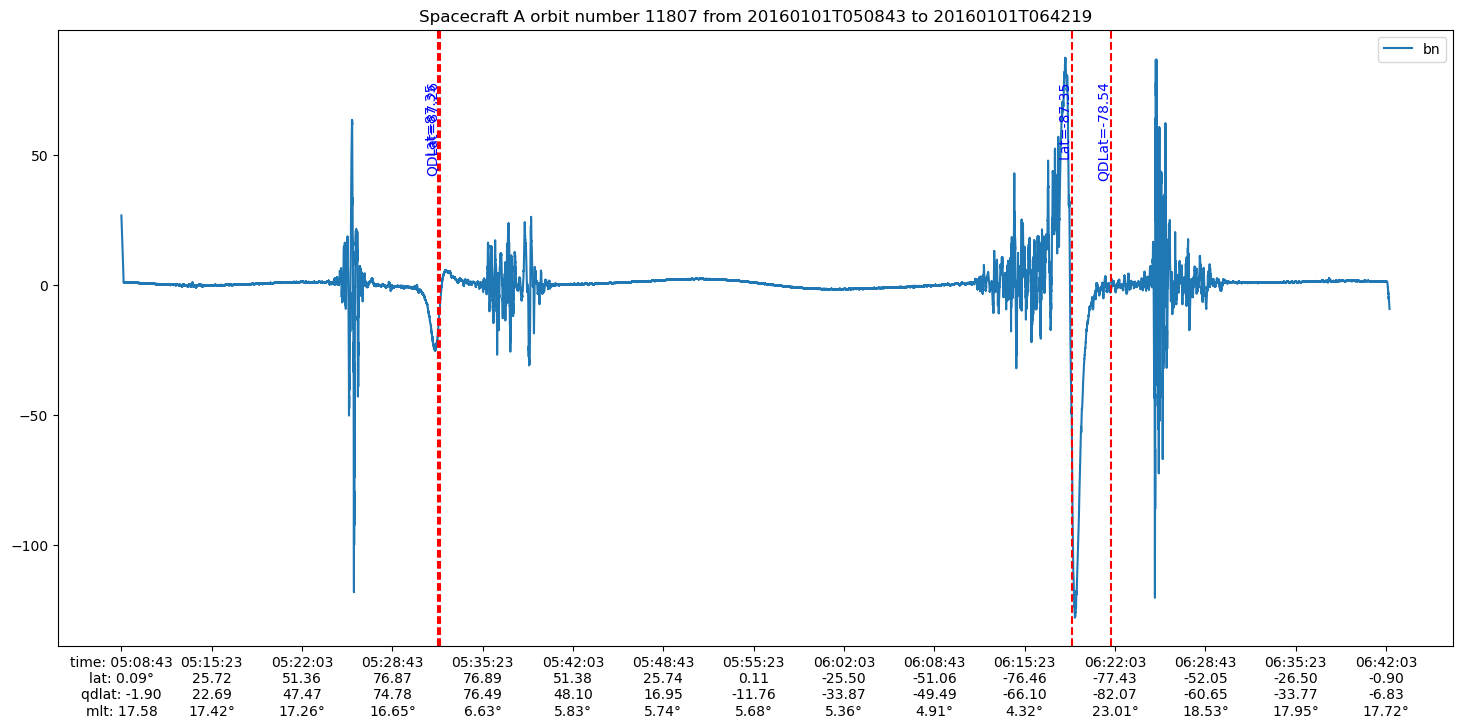

In [54]:
df11807 = pd.read_pickle(r"\\Diskstation1\file_three\aw\swarm\vires\SW_OPER_MAGA_HR_1B\SW_OPER_MAGA_HR_1B_11807_20160101T050843_20160101T064219.pkl")
df_aux11807 = pd.read_pickle(r"\\Diskstation1\file_three\aw\swarm\vires\AHY9U3~9\SW_OPER_MAGA_HR_1B\aux_SW_OPER_MAGA_HR_1B_11807_20160101T050843_20160101T064219.pkl")
bn,be,bc = utils.data.get_3arrs(df11807['B_NEC'])
bn_mov_ave = utils.data.move_average(bn, window=window, center=center, min_periods=min_periods)
bn_disturb = bn - bn_mov_ave

plot_latitude_geo_qd(df11807.index.values,df11807['Latitude'].values,df_aux11807['QDLat'].values,'A',11807,['20160101T050843','20160101T064219'])

plot_disturb_mag_field(df11807.index.values,bn_disturb,df11807['Latitude'].values,df_aux11807['QDLat'].values,df_aux11807['MLT'].values,'A',11807,['20160101T050843','20160101T064219'])

11808

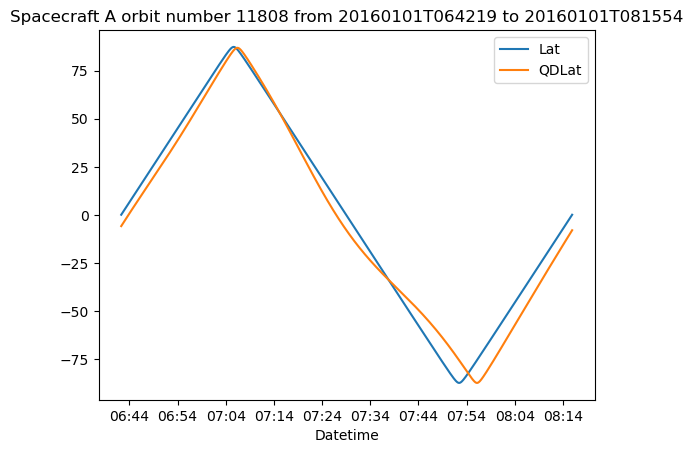

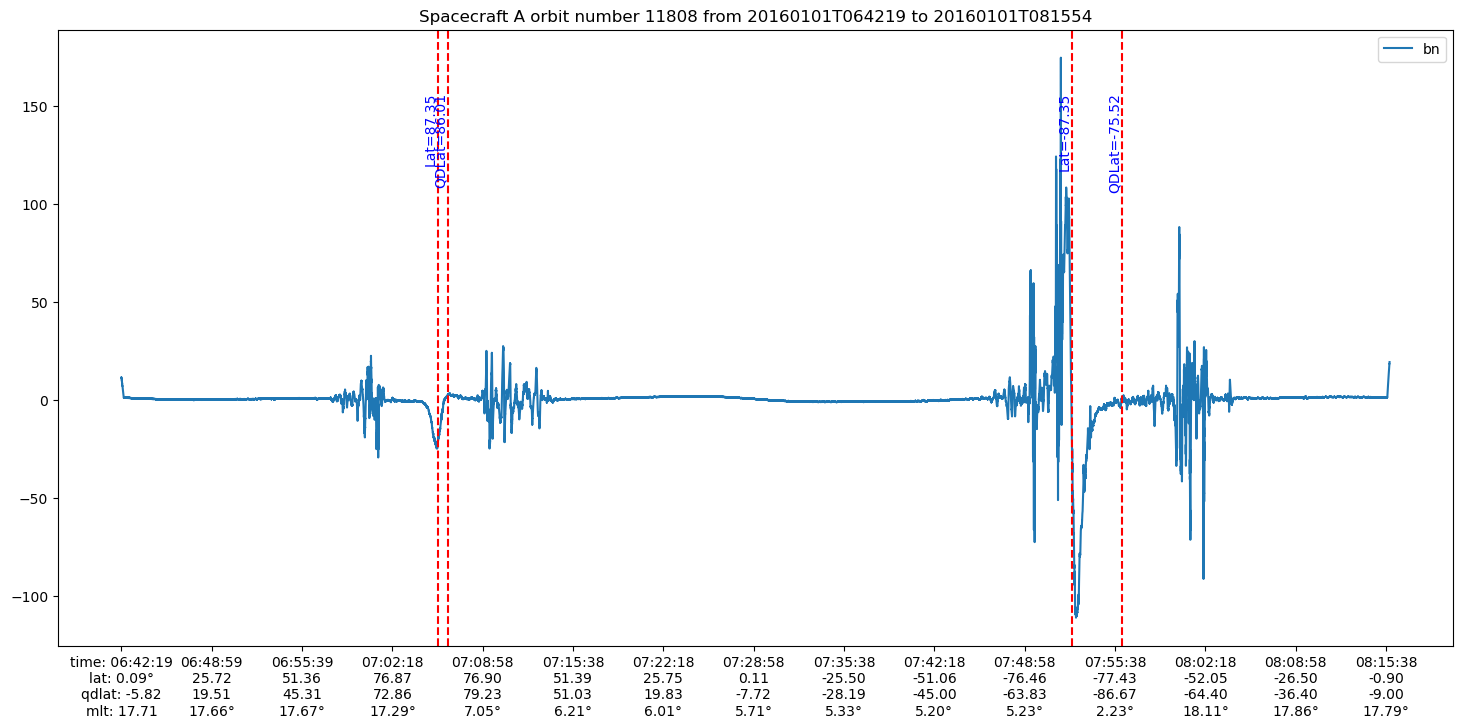

In [55]:
df11808 = pd.read_pickle(r"\\Diskstation1\file_three\aw\swarm\vires\SW_OPER_MAGA_HR_1B\SW_OPER_MAGA_HR_1B_11808_20160101T064219_20160101T081554.pkl")
df_aux11808 = pd.read_pickle(r"\\Diskstation1\file_three\aw\swarm\vires\AHY9U3~9\SW_OPER_MAGA_HR_1B\aux_SW_OPER_MAGA_HR_1B_11808_20160101T064219_20160101T081554.pkl")
bn,be,bc = utils.data.get_3arrs(df11808['B_NEC'])
bn_mov_ave = utils.data.move_average(bn, window=window, center=center, min_periods=min_periods)
bn_disturb = bn - bn_mov_ave

plot_latitude_geo_qd(df11808.index.values,df11808['Latitude'].values,df_aux11808['QDLat'].values,'A',11808,['20160101T064219','20160101T081554'])

plot_disturb_mag_field(df11808.index.values,bn_disturb,df11808['Latitude'].values,df_aux11808['QDLat'].values,df_aux11808['MLT'].values,'A',11808,['20160101T064219','20160101T081554'])